# R for visualization

In [1]:
mydata_merge # note that the varialbes are not shared across notebooks

ERROR: Error in eval(expr, envir, enclos): object 'mydata_merge' not found


Load the example dataset.

In [2]:
data("WorldPhones") 
head(WorldPhones)

,N.Amer,Europe,Asia,S.Amer,Oceania,Africa,Mid.Amer
1951,45939,21574,2876,1815,1646,89,555
1956,60423,29990,4708,2568,2366,1411,733
1957,64721,32510,5230,2695,2526,1546,773
1958,68484,35218,6662,2845,2691,1663,836
1959,71799,37598,6856,3000,2868,1769,911
1960,76036,40341,8220,3145,3054,1905,1008


In [3]:
#Get only the data for 1951
phones_51 <- WorldPhones["1951",]

In [4]:
phones_51

N.Amer   Europe     Asia   S.Amer  Oceania   Africa Mid.Amer 
   45939    21574     2876     1815     1646       89      555

# Bar Plot

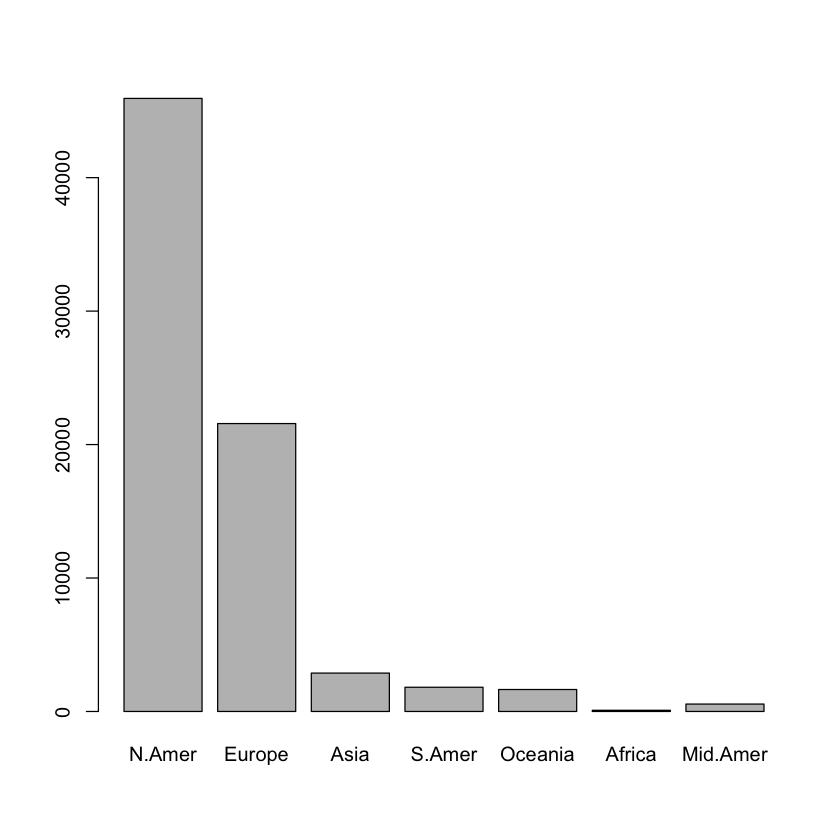

In [5]:
#Create basic barplot
barplot(phones_51)

Add/change few options to the barplot
 - the option col = lets you specify the color
 - the option main = lets you change the title of the plot
 - the option ylim = c() lets you specify the initial and last value for the Y axis
 
For more, see help (cmd + i). Not accurate on arguments of the function. You should click `barplot` and look for options in there.

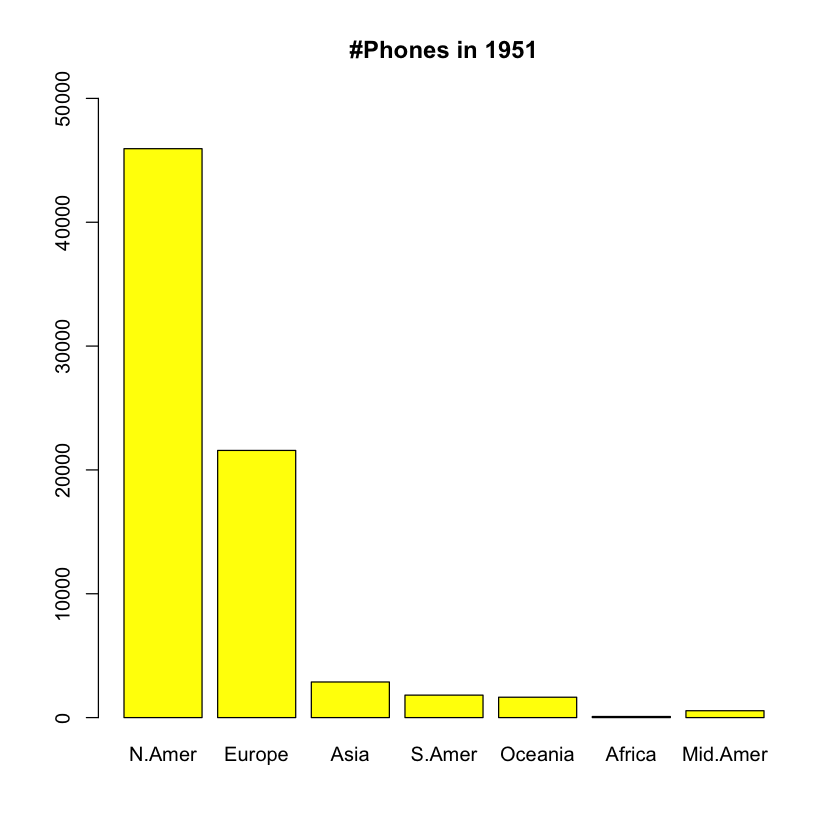

In [8]:
barplot(phones_51, col = "yellow", main = "#Phones in 1951", ylim = c(0, 50000))

# Histogram

In [9]:
#Load iris data
iris <- read.csv("iris.csv")
head(iris)

,sepal_length,sepal_width,petal_length,petal_width,class
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
6,5.4,3.9,1.7,0.4,Iris-setosa


Create an histogram for the distribution of Sepal Width 

In the `hist()` command, first specify which column you want to use


the `xlim = c()` lets you specify the initial and final value of the X axis
the `xlab` lets you specify a label for the X axis

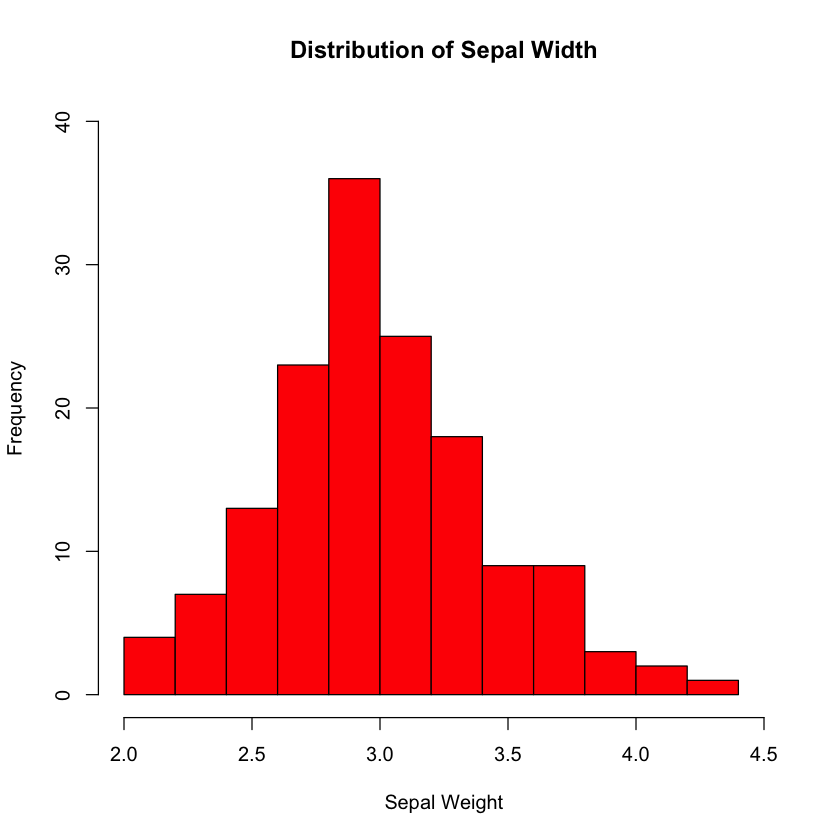

In [10]:
hist(iris$sepal_width, main = "Distribution of Sepal Width", col = "red", 
     ylim = c(0,40), xlim = c(2, 4.5), xlab ="Sepal Weight")

# Boxplot

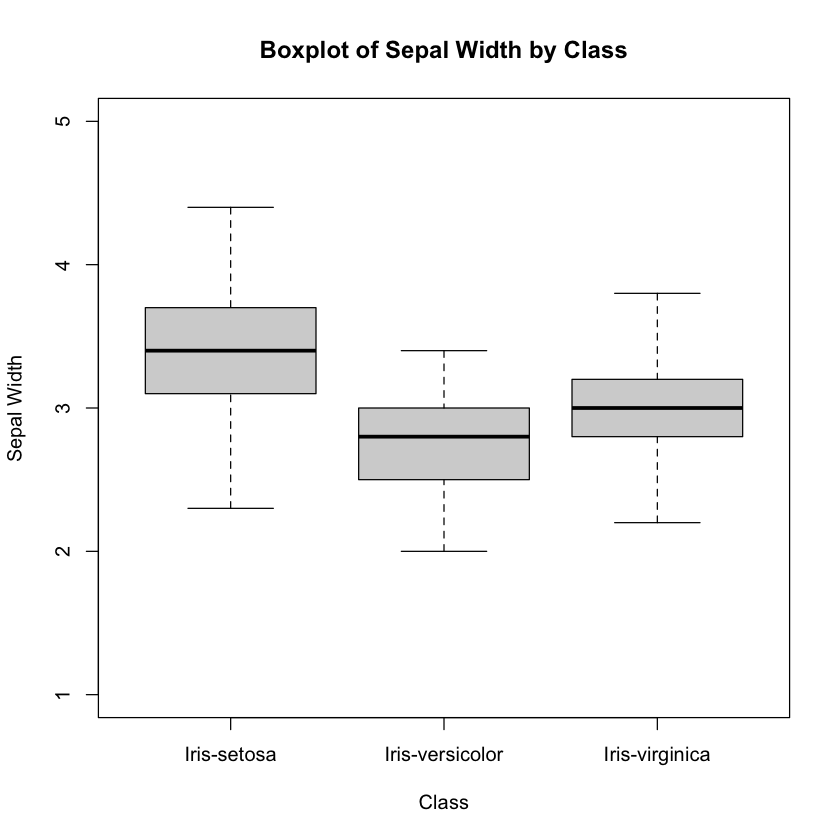

In [11]:
#Create boxplot for Sepal width, by classes (or species)
boxplot(iris$sepal_width ~ iris$class, data = iris, ylim = c(1, 5), range = 0, xlab = "Class", ylab = "Sepal Width", main = "Boxplot of Sepal Width by Class")


If you want to know the statistics related to the boxplot,
first, save the boxplot as `bp` (just a name, nothing special)

statistics for the boxplot will be accessible through `bp$stats`

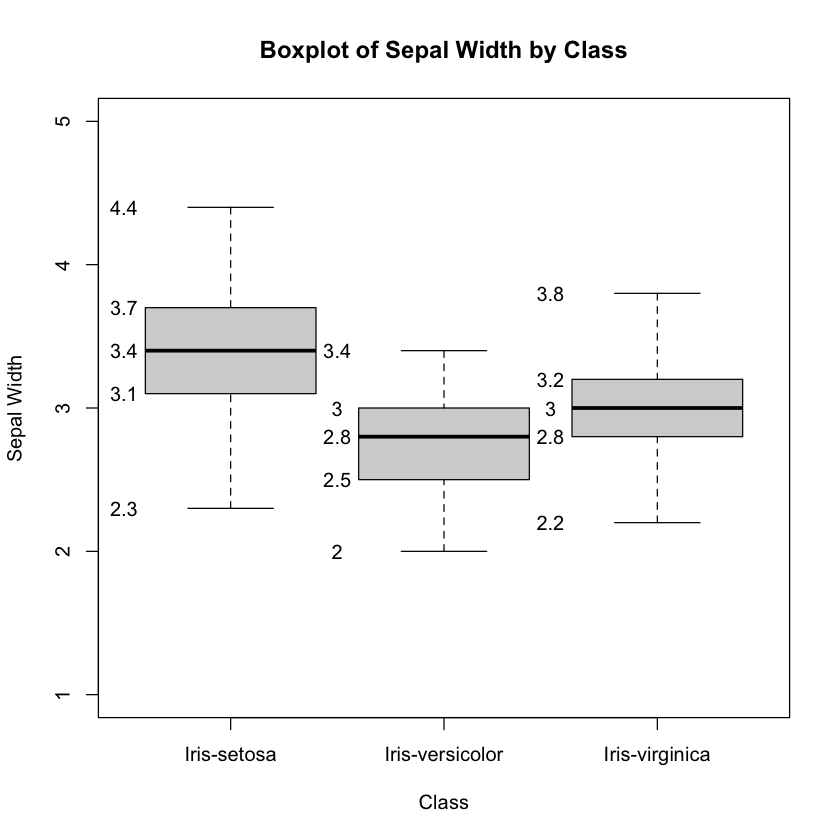

In [20]:
bp <-boxplot(iris$sepal_width ~ iris$class, data = iris, ylim = c(1, 5), range = 0, xlab = "Class", ylab = "Sepal Width", main = "Boxplot of Sepal Width by Class")
#then, run the command below. It will compute the statistics for the boxplot
text(x = col(bp$stats) - .5, y = bp$stats, labels = bp$stats)

# Scatter Plot

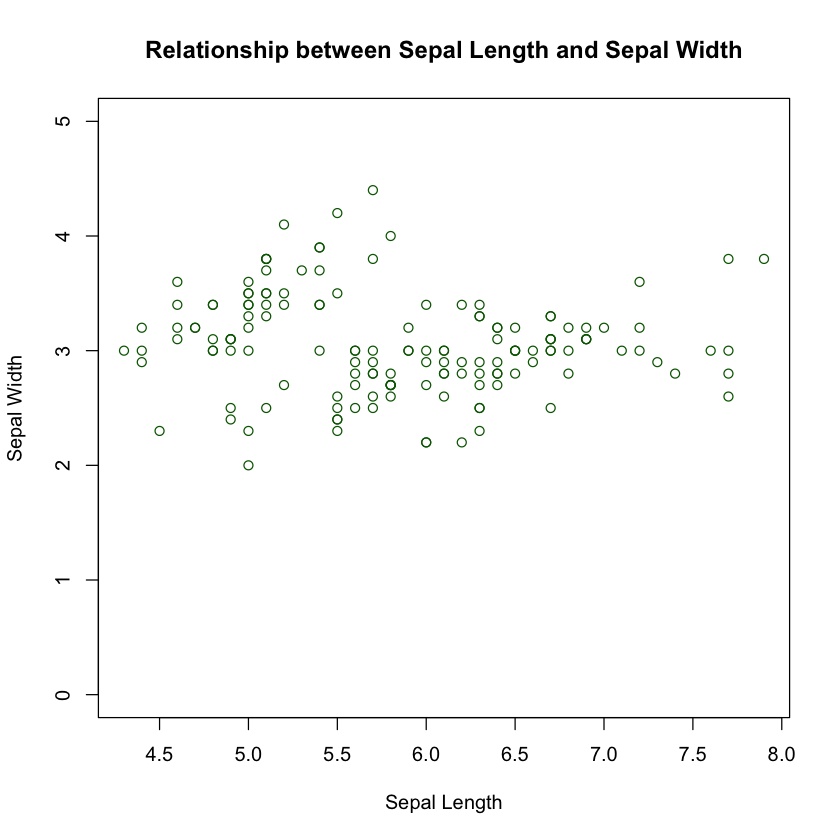

In [22]:
plot(iris$sepal_length, iris$sepal_width, xlab = "Sepal Length", 
     ylab = "Sepal Width", ylim = c(0, 5), col = "dark green", main = "Relationship between Sepal Length and Sepal Width")

# `ggplot2`

More advanced, more professional, more customizable. Most widely used visualization tool.

In [23]:
# install.package("ggplot")

library(ggplot2)

In [24]:
# just wanted to type less in the future

Sepal.Length <- iris$sepal_length
Sepal.Width <- iris$sepal_width

## Q(quick)plot

An easy way to create "quick plots". `qplot` will try to guess what type of plot you want based on the input.

First let's try one variable.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



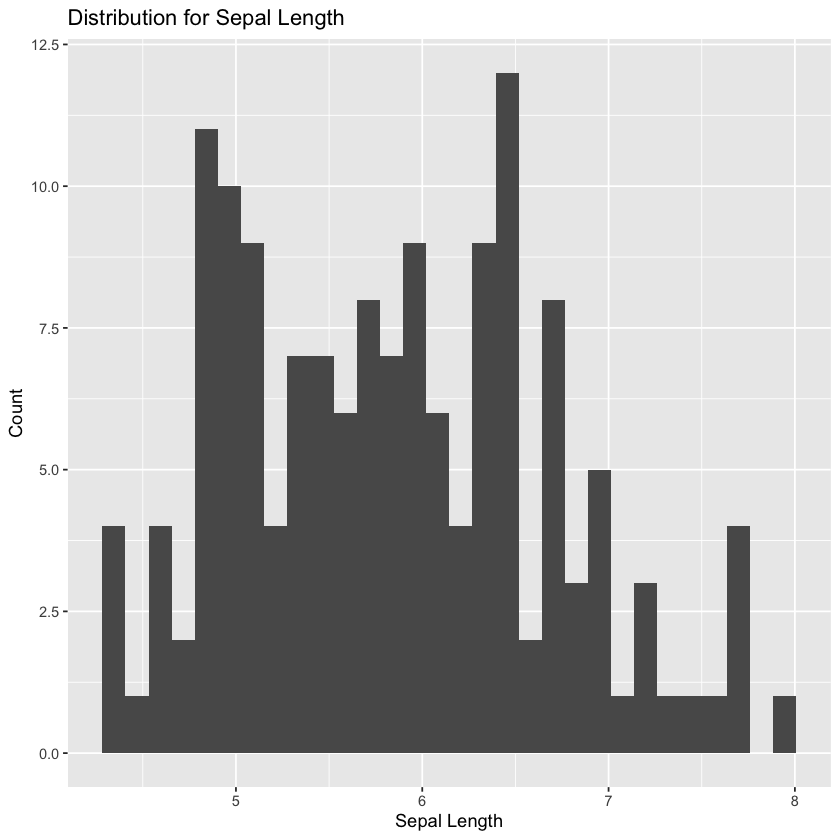

In [25]:
qplot(data = iris, x = Sepal.Length, main = "Distribution for Sepal Length", xlab="Sepal Length", ylab = "Count")


But if you specify two variables, the graph type changed to scatter plot.

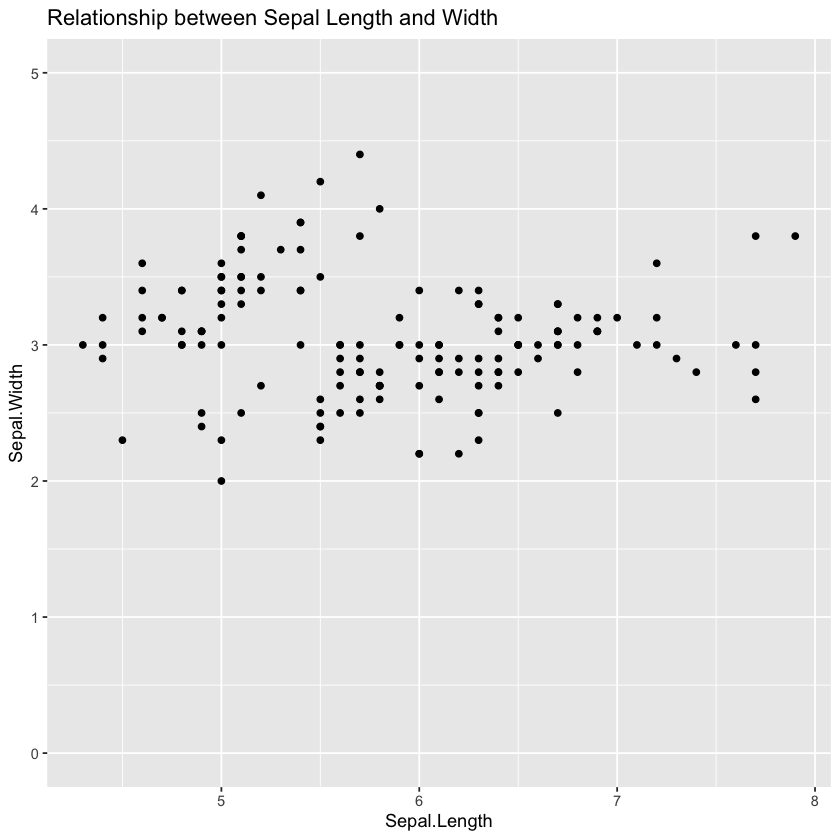

In [26]:
qplot(data = iris, x = Sepal.Length, y=Sepal.Width, ylim = c(0,5), main = "Relationship between Sepal Length and Width")

option `col =` can also be used to assign a different color to different groups in your data.

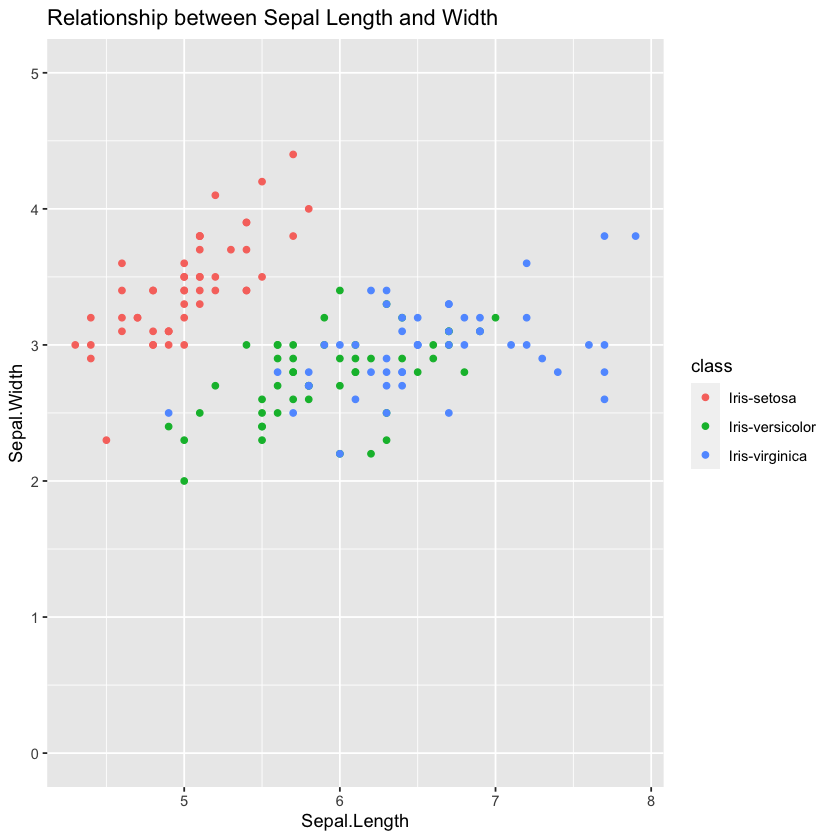

In [27]:
qplot(data = iris, x = Sepal.Length, y=Sepal.Width, col=class, ylim = c(0,5), main = "Relationship between Sepal Length and Width")


## Histogram, revisited

Structure of `ggplot`. First, the skeleton:

`aes()` -> aesthetics

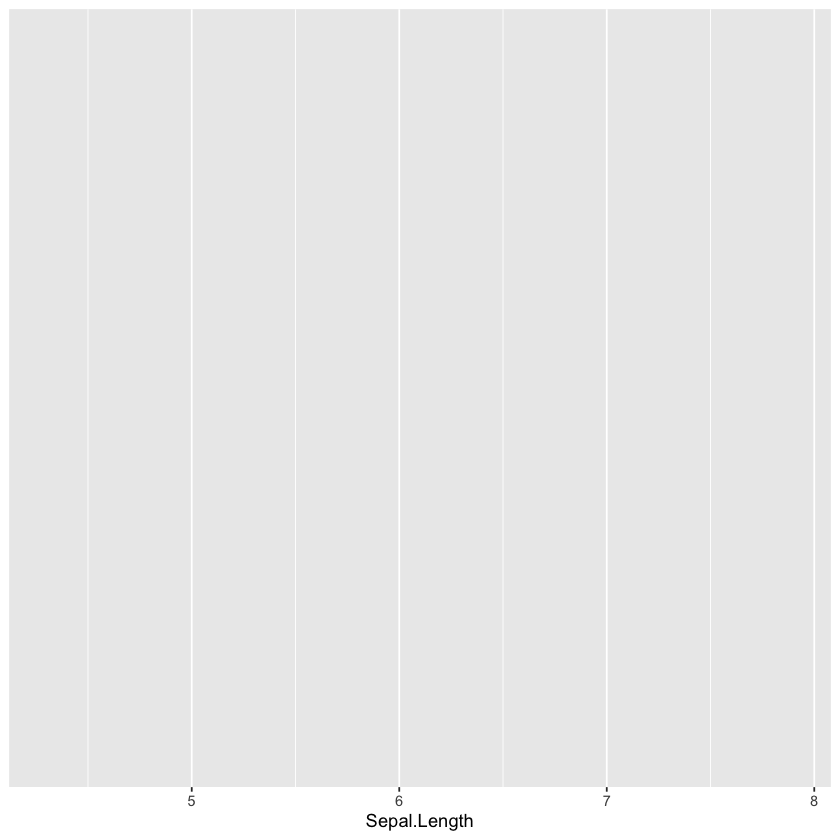

In [29]:
ggplot(data=iris, aes(x = Sepal.Length, fill = class)) #why empty? 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



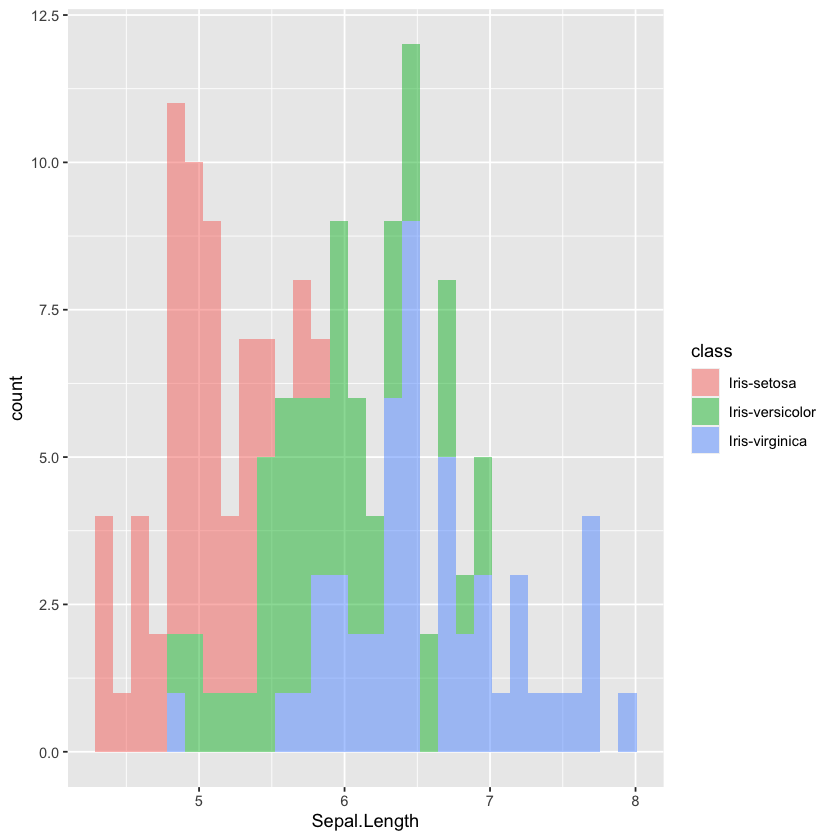

In [30]:
ggplot(data=iris, aes(x = Sepal.Length, fill = class)) + 
  geom_histogram(alpha=0.5) # specify graph type, y-axis is automatically determined

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



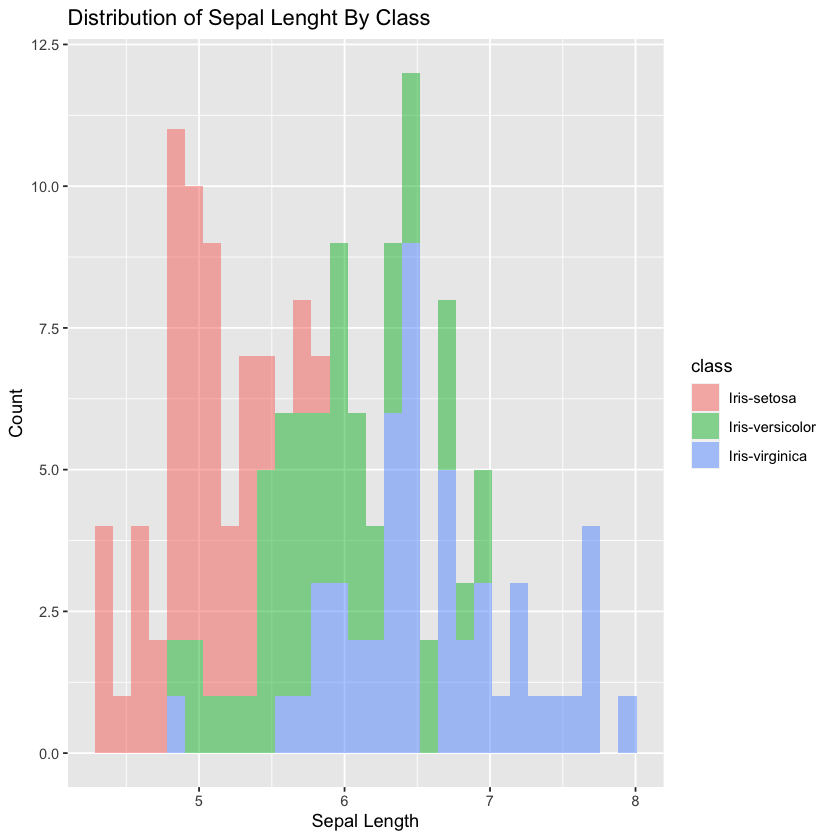

In [32]:
ggplot(data= iris, aes(x = Sepal.Length, fill = class)) + 
  geom_histogram(alpha=0.5) +
  ggtitle("Distribution of Sepal Lenght By Class") + # add title
  labs(x = "Sepal Length", y = "Count") # add label

## Boxplot

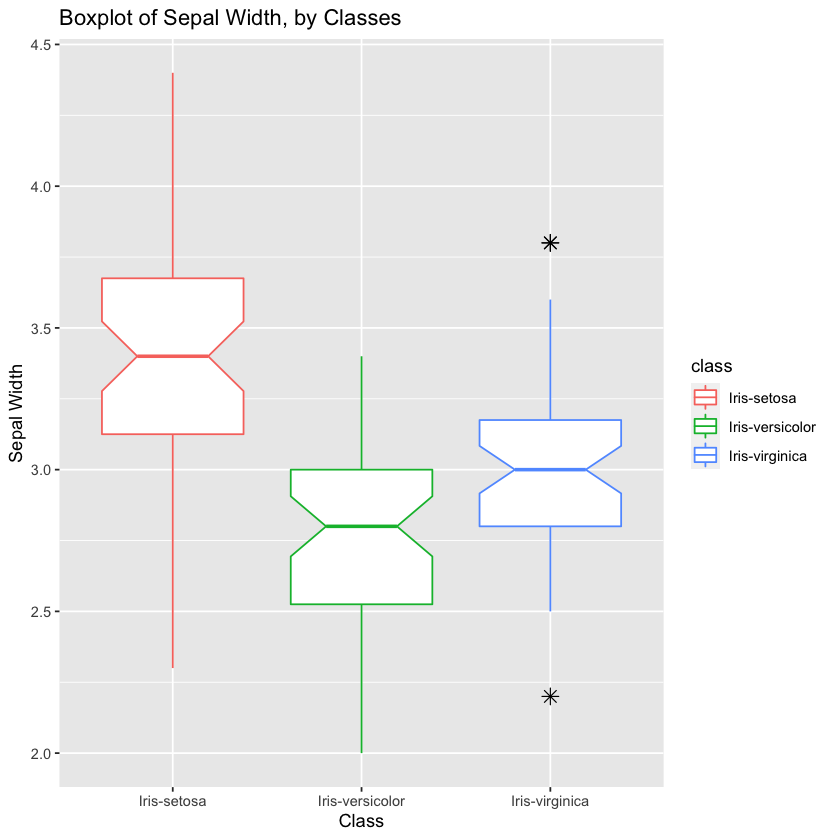

In [33]:
ggplot(data = iris, aes(x=class, y=sepal_width, color=class)) +
  geom_boxplot(notch = TRUE, outlier.colour="black", outlier.shape=8, outlier.size=3) +
  ggtitle("Boxplot of Sepal Width, by Classes") +
  labs(x = "Class", y = "Sepal Width")

## Scatterplot

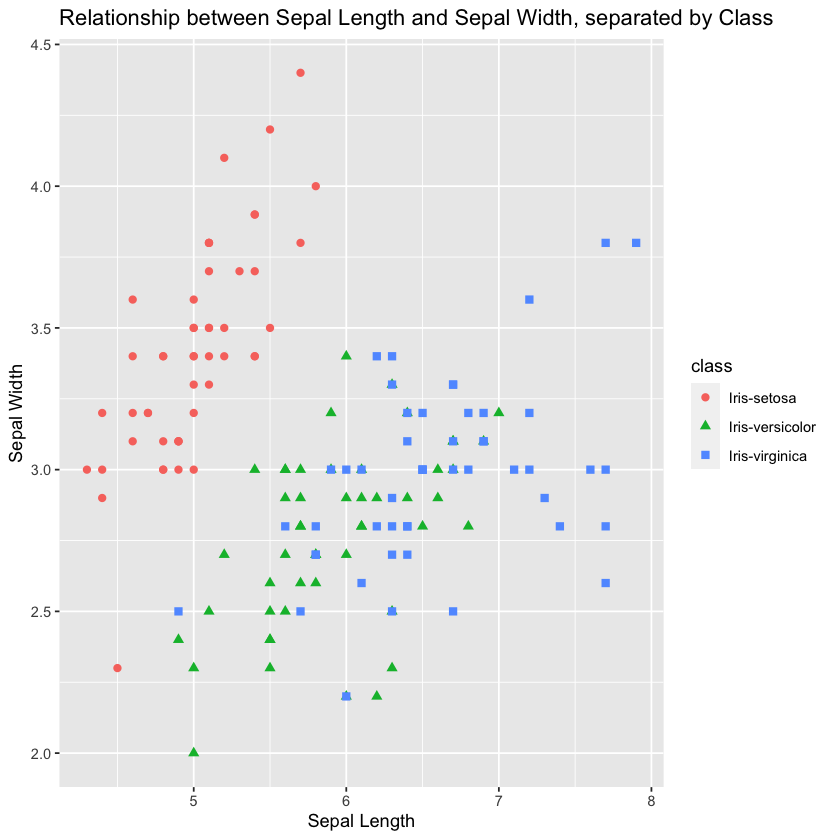

In [34]:
ggplot(data = iris, aes(x=Sepal.Length, y=Sepal.Width, color=class, shape = class)) +
  geom_point(size=2) +
  ggtitle("Relationship between Sepal Length and Sepal Width, separated by Class") +
  labs(x = "Sepal Length", y = "Sepal Width")


`geom_smooth()` using formula 'y ~ x'



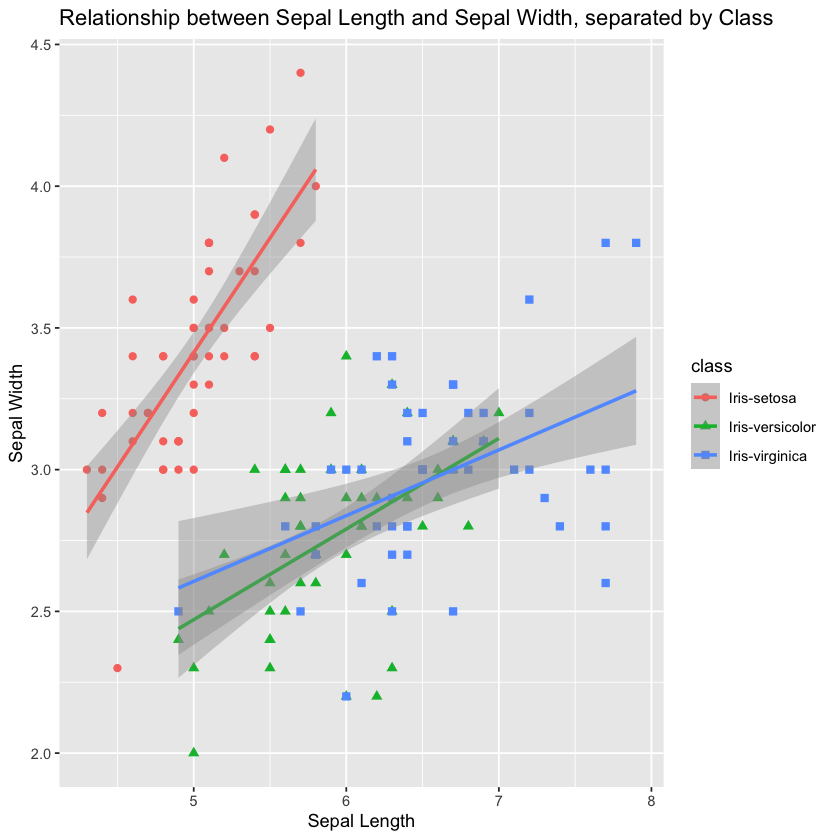

In [35]:
ggplot(data = iris, aes(x=Sepal.Length, y=Sepal.Width, color=class, shape = class)) +
  geom_point(size=2) +
  ggtitle("Relationship between Sepal Length and Sepal Width, separated by Class") +
  labs(x = "Sepal Length", y = "Sepal Width") +
  geom_smooth(method=lm) # add linear regression

## Overlaying, or stacking multiple plots

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



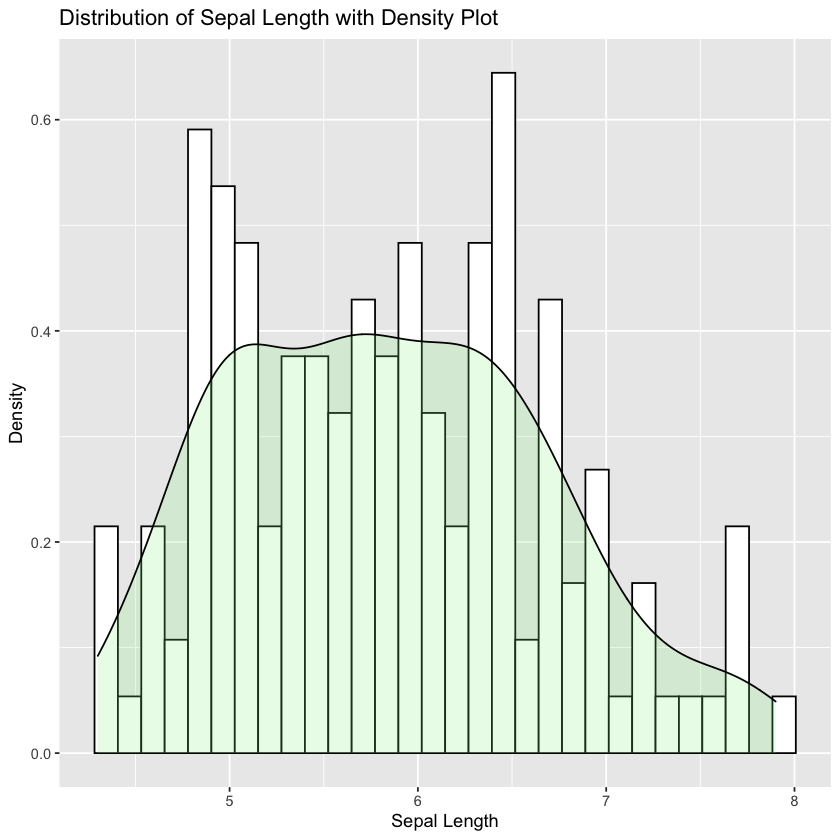

In [37]:
ggplot(data = iris, aes(x = Sepal.Length)) +
    geom_histogram(aes(y=..density..), colour="black", fill="white") + # histgoram
    geom_density(alpha=.2, fill="light green") + # stacked with density plot
    labs(x="Sepal Length", y = "Density")+
    ggtitle("Distribution of Sepal Length with Density Plot")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



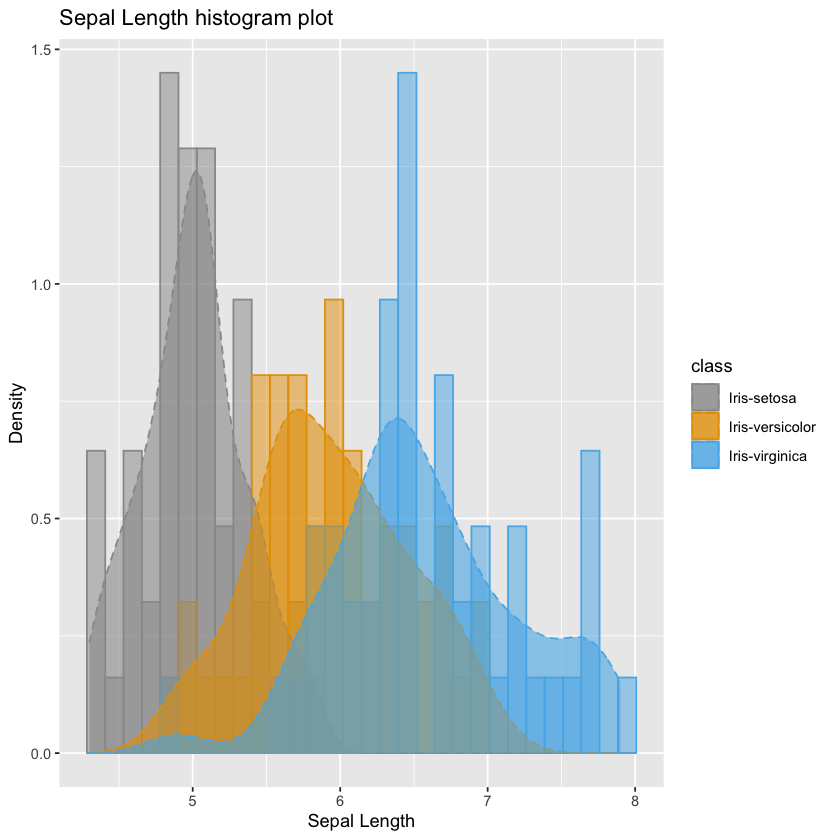

In [38]:
ggplot(data= iris, aes(x=Sepal.Length, color=class, fill=class))+ # color coding in aes option
  geom_histogram(aes(y=..density..), position="identity", alpha=0.5)+
  geom_density(alpha=0.6, linetype = "dashed")+
  scale_color_manual(values=c("#999999", "#E69F00", "#56B4E9"))+ #additionally override some color options
  scale_fill_manual(values=c("#999999", "#E69F00", "#56B4E9"))+
  labs(x="Sepal Length", y = "Density")+
  ggtitle("Sepal Length histogram plot")